# Section 3.5 - Mars SmallSat Aerocapture - Target EFPA Selection

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

In [2]:
planet = Planet('MARS')
planet.loadAtmosphereModel('../../../atmdata/Mars/mars-gram-avg.dat', 0 , 1 ,2, 3)
planet.h_skip = 120e3
planet.h_low  = 10e3
planet.h_trap = 10e3

In [3]:
ATM_height, ATM_density_low, ATM_density_avg, ATM_density_high, ATM_density_pert = planet.loadMonteCarloDensityFile2('../../../atmdata/Mars/LAT00N.txt', 0, 1, 2, 3, 4, heightInKmFlag=True)
density_int_low = planet.loadAtmosphereModel6(ATM_height, ATM_density_low, ATM_density_avg, ATM_density_high, -3.0, 156, 1)
density_int_avg = planet.loadAtmosphereModel6(ATM_height, ATM_density_low, ATM_density_avg, ATM_density_high,  0.0, 156, 1)
density_int_hig = planet.loadAtmosphereModel6(ATM_height, ATM_density_low, ATM_density_avg, ATM_density_high, +3.0, 156, 1)

In [4]:
planet1 = Planet('MARS')
planet2 = Planet('MARS')
planet3 = Planet('MARS')

planet1.density_int = density_int_low
planet2.density_int = density_int_avg
planet3.density_int = density_int_hig

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
h_array = np.linspace(0, 120e3, 1001)

d_min_arr = planet1.densityvectorized(h_array)
d_avg_arr = planet2.densityvectorized(h_array)
d_max_arr = planet3.densityvectorized(h_array)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


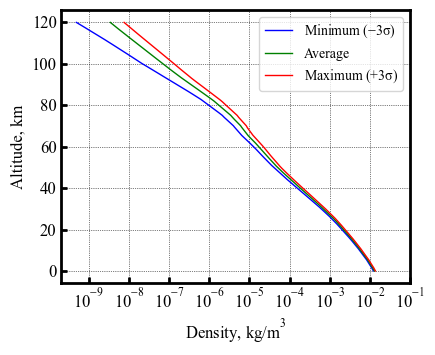

In [16]:
fig = plt.figure()
fig.set_size_inches([4.5, 3.55])

plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.plot(d_min_arr, h_array*1E-3, 'b-', linewidth=1.0, label="Minimum "+r"$(-3\sigma)$")
plt.plot(d_avg_arr, h_array*1E-3, 'g-', linewidth=1.0, label="Average")
plt.plot(d_max_arr, h_array*1E-3, 'r-', linewidth=1.0, label="Maximum "+r"$(+3\sigma)$")
plt.xlabel("Density, kg/m"+r"$^3$",fontsize=12)
plt.ylabel("Altitude, km",fontsize=12)
plt.xscale('log')
plt.yticks(fontsize=12)
plt.xticks(np.logspace(-9, -1, 9), fontsize=12)
plt.grid('on',linestyle='-', linewidth=0.2)

ax=plt.gca()
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)
ax.xaxis.set_tick_params(width=1, length=4, which='minor')
ax.yaxis.set_tick_params(width=1, length=4, which='minor')
ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)

plt.legend(loc='upper right', fontsize=10, framealpha=0.8)

plt.savefig('../../../data/acta-astronautica/smallsat-mission-concepts/mars/mars-mean-density-variations.png', dpi= 300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/smallsat-mission-concepts/mars/mars-mean-density-variations.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/smallsat-mission-concepts/mars/mars-mean-density-variations.eps', dpi=300,bbox_inches='tight')

plt.show()

## Compute corridor bounds for low, avg, and high density atm

In [26]:
planet.density_int = density_int_low

# Set up a vehicle object
vehicle1=Vehicle('MarsSmallSat1', 37, 20, 0.0, 1.767, 0.0, 0.1, planet)
vehicle1.setInitialState(120.0,88.15,-0.65,5.3581,8.5458,-9.4,0.0,0.0)
vehicle1.setSolverParams(1E-6)
vehicle1.setDragModulationVehicleParams(20, 7.5)

underShootLimit, exitflag_us = vehicle1.findUnderShootLimitD2(2400.0, 0.1, -20.0,-5.0, 1E-10, 2000.0)
overShootLimit , exitflag_os = vehicle1.findOverShootLimitD2(2400.0, 0.1, -20.0,-5.0, 1E-10,  2000.0)

print("Overshoot  limit : "+str('{:.4f}'.format(overShootLimit))+ " deg")
print("Undershoot limit : "+str('{:.4f}'.format(underShootLimit))+ " deg")
print("TCW: "+ str('{:.4f}'.format(overShootLimit-underShootLimit))+ " deg")

Overshoot  limit : -9.0353 deg
Undershoot limit : -10.0824 deg
TCW: 1.0471 deg


In [27]:
planet.density_int = density_int_avg

# Set up a vehicle object
vehicle1=Vehicle('MarsSmallSat1', 37, 20, 0.0, 1.767, 0.0, 0.1, planet)
vehicle1.setInitialState(120.0,88.15,-0.65,5.3581,8.5458,-9.4,0.0,0.0)
vehicle1.setSolverParams(1E-6)
vehicle1.setDragModulationVehicleParams(20, 7.5)

underShootLimit, exitflag_us = vehicle1.findUnderShootLimitD2(2400.0, 0.1, -20.0,-5.0, 1E-10, 2000.0)
overShootLimit , exitflag_os = vehicle1.findOverShootLimitD2(2400.0, 0.1, -20.0,-5.0, 1E-10,  2000.0)

print("Overshoot  limit : "+str('{:.4f}'.format(overShootLimit))+ " deg")
print("Undershoot limit : "+str('{:.4f}'.format(underShootLimit))+ " deg")
print("TCW: "+ str('{:.4f}'.format(overShootLimit-underShootLimit))+ " deg")

Overshoot  limit : -8.8386 deg
Undershoot limit : -9.9917 deg
TCW: 1.1531 deg


In [28]:
planet.density_int = density_int_hig

# Set up a vehicle object
vehicle1=Vehicle('MarsSmallSat1', 37, 20, 0.0, 1.767, 0.0, 0.1, planet)
vehicle1.setInitialState(120.0,88.15,-0.65,5.3581,8.5458,-9.4,0.0,0.0)
vehicle1.setSolverParams(1E-6)
vehicle1.setDragModulationVehicleParams(20, 7.5)

underShootLimit, exitflag_us = vehicle1.findUnderShootLimitD2(2400.0, 0.1, -20.0,-5.0, 1E-10, 2000.0)
overShootLimit , exitflag_os = vehicle1.findOverShootLimitD2(2400.0, 0.1, -20.0,-5.0, 1E-10,  2000.0)

print("Overshoot  limit : "+str('{:.4f}'.format(overShootLimit))+ " deg")
print("Undershoot limit : "+str('{:.4f}'.format(underShootLimit))+ " deg")
print("TCW: "+ str('{:.4f}'.format(overShootLimit-underShootLimit))+ " deg")

Overshoot  limit : -8.6511 deg
Undershoot limit : -9.9033 deg
TCW: 1.2522 deg


## Target EFPA selection

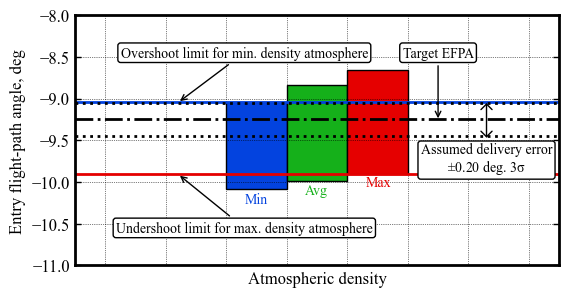

In [17]:
from matplotlib.patches import Polygon

fig = plt.figure()
fig.set_size_inches([6.25,3.25])
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

ax = plt.gca()


x1 = [1.0, 1.0, 2.0, 2.0]
y1 = [-10.0824, -9.0353 , -9.0353 , -10.0824]

x2 = [2.0, 2.0, 3.0, 3.0]
y2 = [-9.9917 , -8.8386, -8.8386,  -9.9917]

x3 = [3.0, 3.0, 4.0, 4.0]
y3 = [-9.9033 , -8.6511 , -8.6511 , -9.9033 ]



poly1 = Polygon( list(zip(x1,y1)), facecolor='xkcd:blue', edgecolor='k')
ax.add_patch(poly1)

poly2 = Polygon( list(zip(x2,y2)), facecolor='xkcd:green', edgecolor='k')
ax.add_patch(poly2)

poly3 = Polygon( list(zip(x3,y3)), facecolor='xkcd:red', edgecolor='k')
ax.add_patch(poly3)


plt.ylabel("Entry flight-path angle, deg",fontsize=12)
plt.xlabel("Atmospheric density",fontsize=12)

plt.tick_params(axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.axhline(y=-9.0353, linewidth=2.0, linestyle='solid' ,color='xkcd:blue')
plt.axhline(y=-9.9033, linewidth=2.0, linestyle='solid' ,color='xkcd:red')
plt.axhline(y=-9.25, linewidth=2.0, linestyle='dashdot' ,color='xkcd:black')
plt.axhline(y=-9.05, linewidth=2.0, linestyle='dotted' ,color='xkcd:black')
plt.axhline(y=-9.45, linewidth=2.0, linestyle='dotted' ,color='xkcd:black')

ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
plt.yticks(fontsize=12)

ax=plt.gca()
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_tick_params(width=1, length=4)
ax.yaxis.set_tick_params(width=1, length=4)
ax.xaxis.set_tick_params(width=1, length=4, which='minor')
ax.yaxis.set_tick_params(width=1, length=4, which='minor')
ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)
    

plt.annotate("Overshoot limit for min. density atmosphere", xy=(0.20, -9.05), xytext=(1.3, -8.45),
               va="center", ha="center",
               arrowprops=dict(arrowstyle='->, head_width=0.2', facecolor='blue'), fontsize=10, color='k',
               bbox=dict(boxstyle='round,pad=0.2', fc='w', ec='k', alpha=1))

plt.annotate("Undershoot limit for max. density atmosphere"  , xy=(0.20, -9.9033),
                                                                   xytext=(1.3, -10.550),
                                                                   va="center", ha="center",
                    arrowprops=dict(arrowstyle='->, head_width=0.2', facecolor='blue'), fontsize=10,color='k',
                     bbox=dict(boxstyle='round,pad=0.2', fc='w', ec='k', alpha=1))

plt.annotate("Target EFPA"  , xy=(4.5, -9.27),
                                                                   xytext=(4.5, -8.45),
                                                                   va="center", ha="center",
                    arrowprops=dict(arrowstyle='->, head_width=0.2', facecolor='blue'), fontsize=10,color='k',
                     bbox=dict(boxstyle='round,pad=0.2', fc='w', ec='k', alpha=1))

plt.annotate("Assumed delivery error\n" +r"$\pm 0.20$"+ " deg. "+ r"$3\sigma$"  , xy=(5.3, -9.02),
                                                                   xytext=(5.3, -9.725),
                                                                   va="center", ha="center",
                    arrowprops=dict(arrowstyle='<->, head_width=0.4', facecolor='blue'), fontsize=10,color='k',
                     bbox=dict(boxstyle='round,pad=0.2', fc='w', ec='k', alpha=1))

ax.set_xlim([-1.5, 6.5])
ax.set_ylim([-11, -8])

plt.text(1.3, -10.25, 'Min', color='xkcd:blue', fontsize=10)
plt.text(2.3, -10.15, 'Avg', color='xkcd:green', fontsize=10)
plt.text(3.3, -10.05, 'Max', color='xkcd:red', fontsize=10)

plt.savefig('../../../data/acta-astronautica/smallsat-mission-concepts/mars/mars-ac-efpa-selection.png', dpi= 300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/smallsat-mission-concepts/mars/mars-ac-efpa-selection.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/smallsat-mission-concepts/mars/mars-ac-efpa-selection.eps', dpi=300,bbox_inches='tight')

plt.show()